<a href="https://colab.research.google.com/github/Icarusleo/Animal-Image-Classifier/blob/main/A_B_Testin_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kagglehub[pandas-datasets]

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# This path should be the name of the file *within* the Kaggle dataset.
# According to the dataset 'marwandiab/cookie-catsdataset', the CSV file is named 'cookie_cats.csv'.
file_path = "cookie_cats.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "marwandiab/cookie-catsdataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2661547399.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 487k/487k [00:00<00:00, 39.7MB/s]

Extracting zip of cookie_cats.csv...


First 5 records:    userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


# **Hipothesesis And Data Structure**

*   Control group: Players encounter with a gate in every 30th level.

*   Test group: The gate is deferred to 40th level.

*   Question: Will moving the gate forward , keep the player in game or make them bored early?





version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64
%95 Confidence interval: % 1.67 between & 7.41 
Mean diff: &4.47


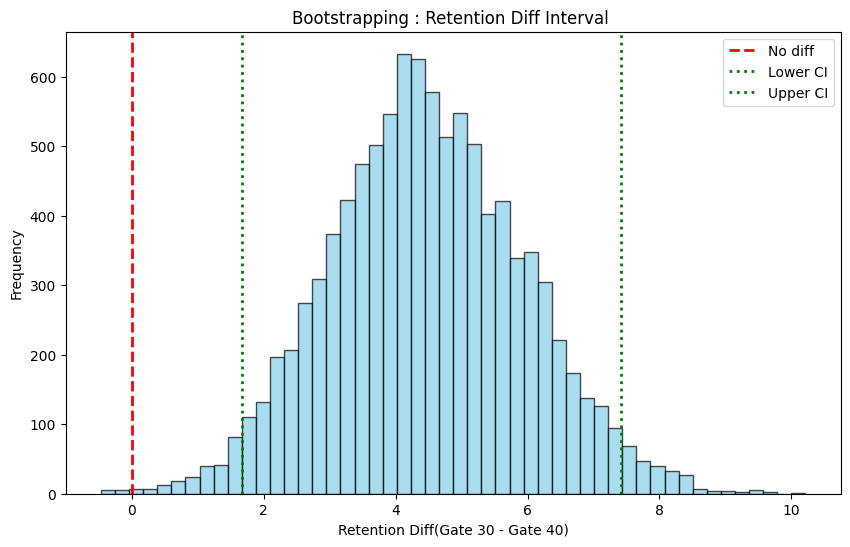

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print(df.groupby('version')['retention_7'].mean())

boot_7d = []

for i in range(10000):
  boot_mean = df.sample(frac=1, replace= True).groupby('version')['retention_7'].mean()
  boot_7d.append(boot_mean)
boot_7d = pd.DataFrame(boot_7d)

boot_7d['diff'] = (boot_7d['gate_30']- boot_7d['gate_40'])/ boot_7d['gate_40']*100

lower_ci = boot_7d['diff'].quantile(0.025)
upper_ci = boot_7d['diff'].quantile(0.975)

print(f"%95 Confidence interval: %{lower_ci: .2f} between &{upper_ci: .2f} ")
print(f"Mean diff: &{boot_7d['diff'].mean():.2f}")

plt.figure(figsize=(10,6))
plt.hist(boot_7d['diff'],bins = 50, color ='skyblue', edgecolor='black', alpha= 0.7)

plt.axvline(x=0, color = 'red',linestyle='--', linewidth=2, label= 'No diff')
plt.axvline(x=lower_ci , color = 'green', linestyle=':', linewidth=2, label= 'Lower CI')
plt.axvline(x=upper_ci , color = 'green',linestyle=':', linewidth=2, label = 'Upper CI')

plt.title('Bootstrapping : Retention Diff Interval ')
plt.xlabel('Retention Diff(Gate 30 - Gate 40)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

--- First 5 row ---
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True

--- Most played users ---
7912     2961
29417    2640
43671    2438
48188    2294
46344    2251
Name: sum_gamerounds, dtype: int64


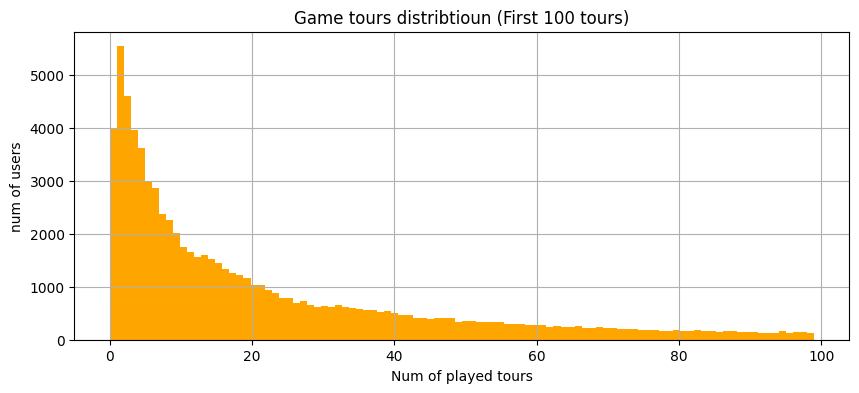


Outlier cleaned


In [5]:


print("--- First 5 row ---")
print(df.head())

print("\n--- Most played users ---")
print(df['sum_gamerounds'].nlargest(5))

plt.figure(figsize=(10, 4))
df[df['sum_gamerounds'] < 100]['sum_gamerounds'].hist(bins=100, color='orange')
plt.title('Game tours distribtioun (First 100 tours)')
plt.xlabel('Num of played tours')
plt.ylabel('num of users')
plt.show()

df = df[df['sum_gamerounds'] < 30000]
print("\nOutlier cleaned")

1-day Retention: %44.52
1 Day retention by group
version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

1-day bootstrapping for 1 day terention (1000 iteration)...
Mean diff (1-day): %&1.30
%95 confidence interval: %-0.21 between & 2.79 


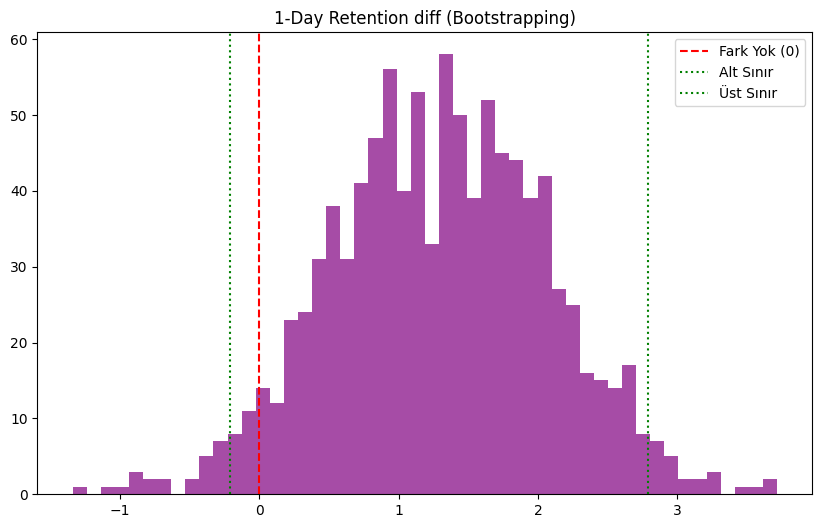


Gate 30'un daha iyi olma olasılığı (Probability): %95.3


In [6]:
print(f"1-day Retention: %{df['retention_1'].mean()*100:.2f}")
print("1 Day retention by group")
print(df.groupby('version')['retention_1'].mean())

boot_1d = []
iterations = 1000
print(f"\n1-day bootstrapping for 1 day terention ({iterations} iteration)...")
for i in range(iterations):
  boot_mean = df.sample(frac=1, replace= True).groupby('version')['retention_1'].mean()
  boot_1d.append(boot_mean)
boot_1d = pd.DataFrame(boot_1d)

# Calculate the 'diff' column after boot_1d DataFrame is created
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100

lower_ci_1d = boot_1d['diff'].quantile(0.025)
upper_ci_1d = boot_1d['diff'].quantile(0.975)

print(f"Mean diff (1-day): %&{boot_1d['diff'].mean():.2f}")
print(f"%95 confidence interval: %{lower_ci_1d: .2f} between &{upper_ci_1d: .2f} ")

plt.figure(figsize=(10, 6))
plt.hist(boot_1d['diff'], bins=50, color='purple', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Fark Yok (0)')
plt.axvline(x=lower_ci_1d, color='green', linestyle=':', label='Alt Sınır')
plt.axvline(x=upper_ci_1d, color='green', linestyle=':', label='Üst Sınır')
plt.title('1-Day Retention diff (Bootstrapping)')
plt.legend()
plt.show()


prob = (boot_1d['diff'] > 0).mean()
print(f"\nGate 30'un daha iyi olma olasılığı (Probability): %{prob * 100:.1f}")

%95 Confidence interval: % 1.71 between & 7.39 
Mean diff: &4.52


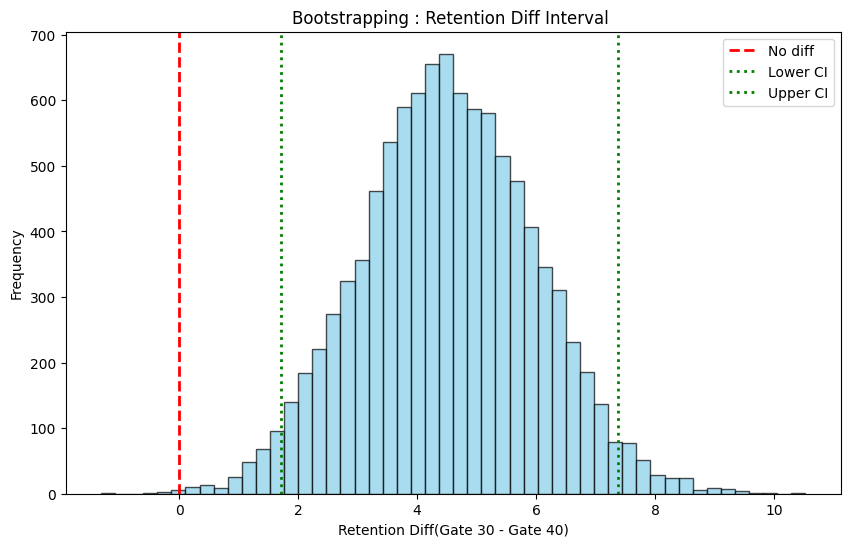

In [ ]:


print(f"%95 Confidence interval: %{lower_ci: .2f} between &{upper_ci: .2f} ")
print(f"Mean diff: &{boot_7d['diff'].mean():.2f}")

plt.figure(figsize=(10,6))
plt.hist(boot_7d['diff'],bins = 50, color ='skyblue', edgecolor='black', alpha= 0.7)

plt.axvline(x=0, color = 'red',linestyle='--', linewidth=2, label= 'No diff')
plt.axvline(x=lower_ci , color = 'green', linestyle=':', linewidth=2, label= 'Lower CI')
plt.axvline(x=upper_ci , color = 'green',linestyle=':', linewidth=2, label = 'Upper CI')

plt.title('Bootstrapping : Retention Diff Interval ')
plt.xlabel('Retention Diff(Gate 30 - Gate 40)')
plt.ylabel('Frequency')
plt.legend()
plt.show()